In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

In [138]:
# Reading the csv file
df=pd.read_csv('ACME-HappinessSurvey2020.csv')

In [140]:
# Changing the column names
df.columns=['Happy=1, Unhappy=0','my order was delivered on time','contents of my order was as I expected','I ordered everything I wanted to order','I paid a good price for my order','I am satisfied with my courier','the app makes ordering easy for me']

In [142]:
# Printing out the new data set with new column names
df

,"Happy=1, Unhappy=0",my order was delivered on time,contents of my order was as I expected,I ordered everything I wanted to order,I paid a good price for my order,I am satisfied with my courier,the app makes ordering easy for me
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
...,...,...,...,...,...,...,...
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5


In [144]:
# There are no null values in the data set
df.columns.isnull()

array([False, False, False, False, False, False, False])

# Feature Engineering

In [146]:
# Calculate the Standard Deviation of each satisfaction score.
df['satisfaction_std'] = df.iloc[:, 1:].std(axis=1)
print(df['satisfaction_std'])
# Calculate the range of each satisfaction score except the target by taking the max and min values.
df['satisfaction_range'] = df.iloc[:, 1:].max(axis=1) - df.iloc[:, 1:].min(axis=1)
print(df['satisfaction_range'])

0      0.752773
1      1.032796
2      1.032796
3      0.983192
4      0.983192
         ...   
121    1.048809
122    1.378405
123    0.894427
124    0.752773
125    1.329160
Name: satisfaction_std, Length: 126, dtype: float64
0      3.247227
1      3.967204
2      3.967204
3      4.016808
4      4.016808
         ...   
121    3.951191
122    3.621595
123    4.105573
124    4.247227
125    3.670840
Name: satisfaction_range, Length: 126, dtype: float64


In [149]:
# Contains the Satisfaction Score of each of the columns except target by taking the mean across each row. 
df['Satisfaction_score'] = df.iloc[:, 1:].mean(axis=1)
df['Satisfaction_score']

0      2.875
1      3.125
2      3.375
3      3.500
4      3.500
       ...  
121    3.250
122    3.250
123    3.625
124    3.500
125    3.750
Name: Satisfaction_score, Length: 126, dtype: float64

In [151]:
# Total satification score for each of the columns except target by taking the sum across each row.
df['total_score'] = df.iloc[:, 1:].sum(axis=1)
df['total_score']

0      25.875
1      28.125
2      30.375
3      31.500
4      31.500
        ...  
121    29.250
122    29.250
123    32.625
124    31.500
125    33.750
Name: total_score, Length: 126, dtype: float64

In [153]:
# Combined the 'my order was delivered on time' and 'I am satisfied with my courier' columns to one column for delivery_courier_satisfaction
# Multiply to combine impact between both features
df['delivery_courier_satisfaction'] = df['my order was delivered on time'] * df['I am satisfied with my courier']
print(df['delivery_courier_satisfaction'])

0       6
1      12
2      15
3      15
4      15
       ..
121    20
122    10
123    20
124    16
125    25
Name: delivery_courier_satisfaction, Length: 126, dtype: int64


In [156]:
# New dataset after feature engineering
df

,"Happy=1, Unhappy=0",my order was delivered on time,contents of my order was as I expected,I ordered everything I wanted to order,I paid a good price for my order,I am satisfied with my courier,the app makes ordering easy for me,satisfaction_std,satisfaction_range,Satisfaction_score,total_score,delivery_courier_satisfaction
0,0,3,3,3,4,2,4,0.752773,3.247227,2.875,25.875,6
1,0,3,2,3,5,4,3,1.032796,3.967204,3.125,28.125,12
2,1,5,3,3,3,3,5,1.032796,3.967204,3.375,30.375,15
3,0,5,4,3,3,3,5,0.983192,4.016808,3.500,31.500,15
4,0,5,4,3,3,3,5,0.983192,4.016808,3.500,31.500,15
...,...,...,...,...,...,...,...,...,...,...,...,...
121,1,5,2,3,4,4,3,1.048809,3.951191,3.250,29.250,20
122,1,5,2,3,4,2,5,1.378405,3.621595,3.250,29.250,10
123,1,5,3,3,4,4,5,0.894427,4.105573,3.625,32.625,20
124,0,4,3,3,4,4,5,0.752773,4.247227,3.500,31.500,16


# Machine Learning 

In [159]:
# Create the target data y and the data used to find the target X.
X=df.drop('Happy=1, Unhappy=0',axis=1)
y=df['Happy=1, Unhappy=0']

In [161]:
# Create the training and testing cases using train_test_split, where test size is 20 percent, random state is 42, and stratify=y to prevent imbalances/biased patterns.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [163]:
# For feature section, I used the RandomForestClassifier to help reduce my feature set for feature models.
model = RandomForestClassifier(random_state=42)
# model is then fit with the training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

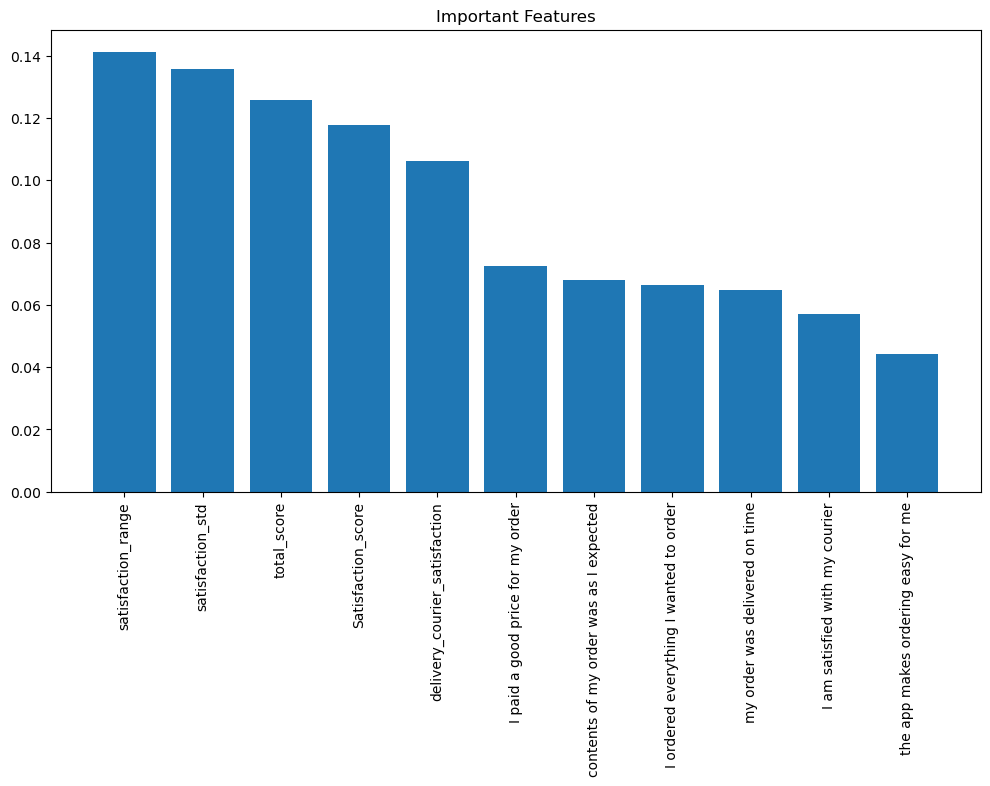

In [165]:
# From the RandomForestClassifier, we use the feature_importances_ to see which feature is the most important in our model
variable_importance=model.feature_importances_
# Each column, other then the target, is placed into features
variables = X.columns
# Using argsort, the features are placed in descending order with [::-1]. 
variable_indices = np.argsort(variable_importance)[::-1] 
# Plotting the important features in descending order
plt.figure(figsize=(12, 6))
# Set title as Important Features
plt.title('Important Features')
# A bar plot is created illustrating the range of numbers for the position of each of the features as well as the features themselves.
plt.bar(range(X.shape[1]), variable_importance[variable_indices])
# the labels are shown by the xticks where the list of feature names is created or sorted in descending order
plt.xticks(range(X.shape[1]), [variables[i] for i in variable_indices], rotation=90) # rotated the labels 90 degrees for better readability. 
plt.show()

In [167]:
# I want to use the first 7 features with the highest importance for the new training and testing set and obtain the most useful variables.
important_variables = [variables[i] for i in variable_indices[:7]]
X_train = X_train[important_variables]
X_test= X_test[important_variables]

In [169]:
# XGBClassifier is used because it works the best with structured data. 
model_XGB = XGBClassifier(random_state=42, eval_metric='logloss') # I used logloss since it works well in binary classifications (1 & 0s)

# Hyperparameter tuning that was used
parameters = {
    'n_estimators': [100, 200, 300, 400, 500], # represents the number of trees (I used 100 to 500 tress for better model and prevent overfitting)
    'max_depth': [3, 4, 5, 6, 7, 8], # Used a max depth of 3 to 8 didnt want more then 8 so it can be detailed enough but no overfit
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3], # learning rate of 0.01 to 0.3 was used, generally wanted a lower learning rate for better results.
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],  # for the subsample or percentage number of training data used per tree I also wanted smaller values less then 1 to prevent overfitting.    
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0], # percentage of features used per tree, I used smaller values to add regularization and reduce overfitting.
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]  # The minimum loss reduction given by gamma between 0 to 0.4           
}

# Perform Randomized Search for XGBoost
random = RandomizedSearchCV(
    estimator=model_XGB, # set the modeling technique
    param_distributions=parameters, # set the parameters above
    n_iter=100, # Used 100 different random combinations of the parameters
    cv=5, # Used a 5-fold cross validation for each of the different combinations
    verbose=2, # Displayed the output
    random_state=42, # Random state 
    n_jobs=-1 # Parallel Processing
)
# fit the random model with the training data
random.fit(X_train, y_train)

# Obtained the best XGBClassifier model
print("Best Parameters", random.best_params_) # Best parameters found from the given parameters 
print("Best Score", random.best_score_) # the best average score that was found from the model

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters {'subsample': 0.6, 'n_estimators': 500, 'max_depth': 4, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 1.0}
Best Score 0.6300000000000001


In [171]:
# Predicted y_pred from the test set
y_pred=random.predict(X_test)

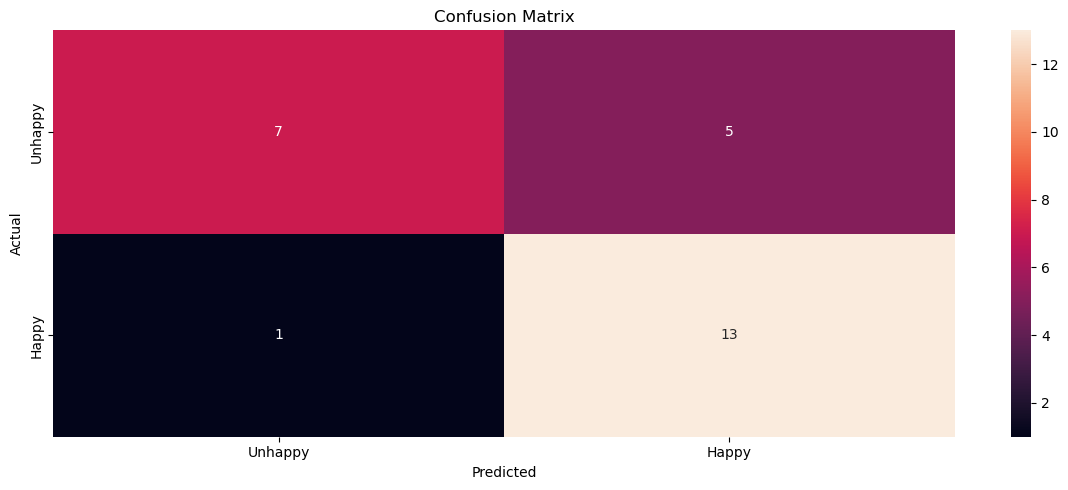

In [173]:
# A Confusion Matrix is then created to compare the actual vs predicted values
plt.figure(figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', xticklabels=['Unhappy', 'Happy'], yticklabels=['Unhappy', 'Happy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [175]:
# Created a classification report illustrating the precision,recall,f1-score, andsupport
print(classification_report(y_test, y_pred))
# An accuracy score of 0.7692307692307693 was found from the predicted compared to the testing.
print("Accuracy Score", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.72      0.93      0.81        14

    accuracy                           0.77        26
   macro avg       0.80      0.76      0.76        26
weighted avg       0.79      0.77      0.76        26

Accuracy Score: 0.7692307692307693


 # Solution Technique Summary

I started by engineering new features to better capture patterns in the data. Using a Random Forest model, I identified the most important variables, then applied XGBoost for its strength with structured data, using several hyper parameters for the most efficent model. After tuning it with random search, I achieved a 77% accuracy.